# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터**


---


* *순환 신경망은 사람이 문장을 읽는 것처럼 이전에 나온 데이터를 기억하면서 단어별로 또는 한 눈에 들어오는 만큼씩 처리합니다. 이는 문장에 있는 의미를 자연스럽게 표현하도록 도와줍니다. 즉, 과거의 데이터 정보를 사용하며 데이터를 처리하는 것입니다.*

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 **단방향 구조**

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>
- 왼쪽을 펼친다면 오른쪽그림

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one (입력 하나, 출력 하나)
  - RNN

- one to many (입력 하나, 출력 여러개)
  - Image Captioning

  - 이미지에 대한 설명 생성

- many to one (입력 여러개, 출력 하나)
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many (입력 여러개, 출력 여러개)
  - Machine Translation(번역모델)

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)
###### *(NUMPY로 RNN 구현하기)*

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [3]:
import numpy as np

In [4]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, )) # 상태값 초기화, an all-zero vector, (64,)
# time = t일 때 RNN을 통해 나온 결과값, 상태값을 의미한다. 위의 그림에서는 h_t와 같다.

W = np.random.random((output_features, input_features)) # Weight값 # (64,32)
U = np.random.random((output_features, output_features)) # (64,64)
b = np.random.random((output_features, )) # bias # (64,)

sucessive_outputs = []

# time = t일 때의 입력 값. 위의 그림에서는 x_t와 같다
# state_t와 input_t, 그림에서 h_t와 x_t는 모두 vector 형태

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  sucessive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(sucessive_outputs, axis=0)
# 위의 final_output_sequnce의 shape = (100, 64) = (timesteps, output_features)

### 도식화했을 때 그림 - 내가 가져옴
<img src="https://user-images.githubusercontent.com/24144491/49584602-36d75c80-f99f-11e8-801e-c790f1204ff7.png">

## 케라스의 순환층
##### *케라스에서 이미 RNN 층을 설계해놓고 제공*
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음 (다음 입력으로 출력을 줄지 True False로 결정가능)
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


*SimpleRNN은 두 가지 모드로 실행할 수 있는데, 각 타임스텝의 출력을 모은 전체 시퀀스를 리턴하거나(이 때, 출력의 크기는 (batch_size, timesteps, output_features)입니다), -3D 텐서*
<br><br>
*입력 시퀀스에 대한 마지막 출력만 리턴할 수 있습니다(이 때, 출력의 크기는 (batch_size, output_featrues)입니다.) 이 설정은 객체를 생성할 때 매개변수 return_sequences를 통해서 설정합니다. -2D 텐서*

###### Keras로 RNN 짜보기

In [5]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [6]:
# 마지막 타임 스텝의 출력만 얻는 예시. SimpleRNN()의 매개변수로 들어간 값 32는 해당 층에서의 유닛의 개수. 반드시 임베딩층의 차원과 같을 필요는 없

model = Sequential()
model.add(Embedding(10000, 32)) # input-dim : 10000, output-dim : 32 -> parameter의 수 320000
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 다음 예는 전체 상태 시퀀스를 리턴
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True)) # 전체 시퀀스를 다 얻으려면 return_sequences = True 로 바꿔주자.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [8]:
# 순환층 추가하기
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True)) # 다음 입력으로 출력을 줌 # 아래로 넘겨주고
model.add(SimpleRNN(32, return_sequences = True)) # 아래로 넘겨주고 ..
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32)) # 마지막이니까 넘겨줄 필요 없음 # 마지막의 경우 이 출력 입력으로 넣을 층이 없
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* simpleRNN의 parameter수 계산
- 입력에 대한 가중치: 32 * 32 = 1024
- 이전 상태에 대한 가중치: 32 * 32 = 1024
- 편향: 32
- 따라서 총 파라미터 수는 1024 + 1024 + 32 = 2080입니다.

## IMDB 데이터 적용

### 데이터 로드

In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [10]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len) # padding을 해주면 max_len크기만큼 fixed된 공간을 만들고 공간만큼 채움
input_test = sequence.pad_sequences(input_test, maxlen= max_len)
print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [11]:
from tensorflow.keras.layers import Dense

In [12]:
# 임베딩층과 SimpleRNN층을 사용하여 간단한 RNN을 훈련
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid')) # 긍정/부정에 대해 하나만 필요해서 1

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [13]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 88s 543ms/step - loss: 0.6033 - acc: 0.6621 - val_loss: 0.4239 - val_acc: 0.8268
Epoch 2/10
157/157 [==============================] - 81s 516ms/step - loss: 0.3850 - acc: 0.8378 - val_loss: 0.4323 - val_acc: 0.8052
Epoch 3/10
157/157 [==============================] - 82s 522ms/step - loss: 0.3047 - acc: 0.8780 - val_loss: 0.3755 - val_acc: 0.8350
Epoch 4/10
157/157 [==============================] - 73s 463ms/step - loss: 0.2442 - acc: 0.9057 - val_loss: 0.5206 - val_acc: 0.7602
Epoch 5/10
157/157 [==============================] - 73s 464ms/step - loss: 0.1975 - acc: 0.9268 - val_loss: 0.3602 - val_acc: 0.8724
Epoch 6/10
157/157 [==============================] - 75s 479ms/step - loss: 0.1521 - acc: 0.9448 - val_loss: 0.3805 - val_acc: 0.8498
Epoch 7/10
157/157 [==============================] - 73s 465ms/step - loss: 0.1186 - acc: 0.9607 - val_loss: 0.4644 - val_acc: 0.8196
Epoch 8/10
157/157 [==============================] - 7

### 시각화

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-14-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


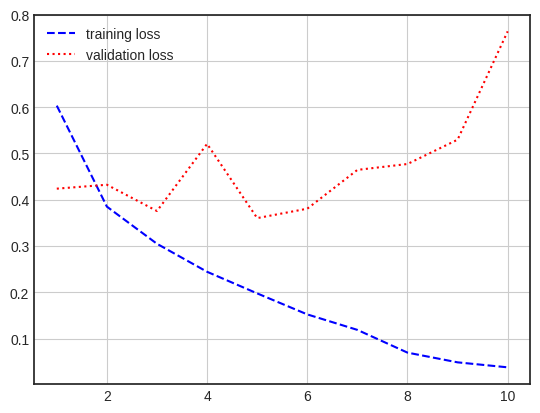

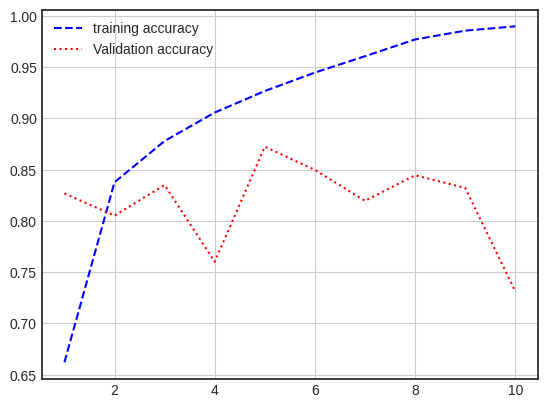

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='Validation accuracy')
plt.grid()
plt.legend()

plt.show()
# training은 잘 학습되는데 validation은 overfitting되어 튐

In [16]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 36s 46ms/step - loss: 0.7269 - acc: 0.7475


[0.7268543839454651, 0.7474799752235413]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- *SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음*

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



---
그래디언트 소실(Gradient Vanishing)은 신경망에서 발생하는 일반적인 문제 중
하나입니다. 이 문제는 역전파(backpropagation) 알고리즘이 깊은 신경망에서 잘 동작하지 않을 때 발생합니다.

신경망에서 역전파 알고리즘은 오차를 각각의 가중치에 역방향으로 전파하여 가중치를 업데이트합니다. 이 때, 각 층의 가중치를 조절하기 위해 사용되는 기울기(gradient)는 입력 층으로부터 출력 층까지 전달되는데, 이 과정에서 가중치들을 업데이트하기 위한 학습 신호가 전파되는데, 이 신호가 사라지거나(exploding) 매우 작아지는(vanishing) 경우가 있습니다.

그래디언트 소실이 발생하면 신경망의 하위층으로 전달되는 기울기가 매우 작아져서 해당 층의 가중치가 거의 업데이트되지 않거나 거의 변화가 없는 문제가 발생합니다. 이는 하위층의 학습이 제대로 이루어지지 않고, 결국 전체 신경망의 성능에 부정적인 영향을 미칩니다.

---

그래디언트 소실 문제는 심층 신경망에서 역전파될 때 그래디언트가 점차적으로 소실되는 문제입니다. 이는 주로 활성화 함수의 미분이 1보다 작아서 발생하며, 하위 레이어의 가중치 업데이트가 거의 이루어지지 않아 훈련이 어려워지는 현상입니다.

---



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

  - 장기적으로 유지시킬 것과 소실시킬 것을 구분해줌

## IMDB 데이터

### 데이터 로드

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
num_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

# 패딩 추가! 길이 일정하게 맞춰주자
pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len) # padding을 해주면 max_len크기만큼 fixed된 공간을 만들고 공간만큼 채움
pad_x_test = sequence.pad_sequences(x_test, maxlen= max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU, Embedding

In [20]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




---
* LSTM(Long Short-Term Memory) 레이어의 파라미터 수는 다음과 같이 계산됩니다:
* 입력에 대한 가중치: (input_dim * 4 * units)
* 이전 은닉 상태에 대한 가중치: (units * 4 * units)
* 바이어스: (4 * units)

- 3가지 요소의 파라미터 수를 모두 더하면 LSTM 레이어의 총 파라미터 수를 얻을 수 있다
---




### 모델 학습

In [21]:
history = model.fit(pad_x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 86ms/step - loss: 0.6061 - acc: 0.6582 - val_loss: 0.6755 - val_acc: 0.6446
Epoch 2/10
157/157 [==============================] - 11s 71ms/step - loss: 0.3635 - acc: 0.8475 - val_loss: 0.4206 - val_acc: 0.8496
Epoch 3/10
157/157 [==============================] - 8s 52ms/step - loss: 0.2756 - acc: 0.8938 - val_loss: 0.2984 - val_acc: 0.8868
Epoch 4/10
157/157 [==============================] - 9s 56ms/step - loss: 0.2296 - acc: 0.9118 - val_loss: 0.4252 - val_acc: 0.8334
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.2065 - acc: 0.9252 - val_loss: 0.2896 - val_acc: 0.8838
Epoch 6/10
157/157 [==============================] - 6s 39ms/step - loss: 0.1781 - acc: 0.9347 - val_loss: 0.4097 - val_acc: 0.8306
Epoch 7/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1616 - acc: 0.9430 - val_loss: 0.3396 - val_acc: 0.8738
Epoch 8/10
157/157 [==============================] - 5s 34ms/step 

### 시각화

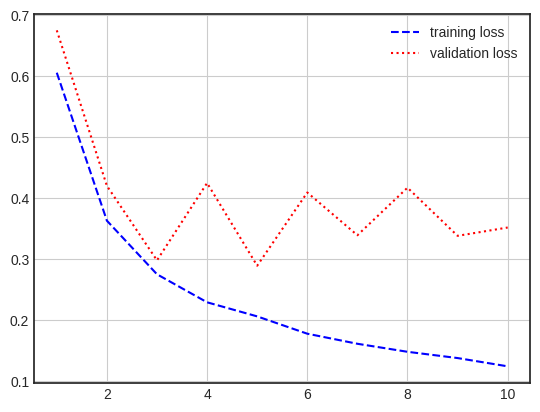

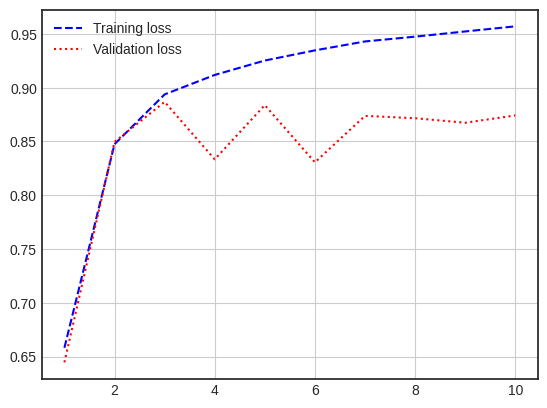

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='Training loss')
plt.plot(epochs, val_acc, 'r:', label='Validation loss')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [23]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.3775 - acc: 0.8662


[0.3774636387825012, 0.866159975528717]

# GRU (Gated Recurrent Unit)
- LSTM(input,output 다 있으니까)을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함


---
- LSTM과는 달리 GRU는 상태 게이트라고 하는 단일 게이트만 사용합니다. 이 상태 게이트는 입력 게이트와 삭제 게이트의 역할을 동시에 수행합니다.

---



  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터 (로이터)

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋
  - 다중 분류 문제


### 데이터셋 로드

In [24]:
from tensorflow.keras.datasets import reuters

In [36]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape) #8982개
print(y_train.shape)

print(x_test.shape) # 2246개
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [37]:
# 전처리
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
max_len = 300

In [39]:
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

# print(len(x_train[0])) # 87개
print(len(pad_x_train[0])) # 300

300


In [40]:
pad_x_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding

In [42]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax')) # softmax 활성화 함수를 사용하여 다중 클래스 분류를 위한 확률 분포를 출력

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

# Adam(Adaptive Moment Estimation) 옵티마이저는 경사 하강법의 한 종류로, 머신 러닝과 딥 러닝에서 널리 사용되는 최적화 알고리즘 중 하나입니다.
# Adam은 RMSprop과 모멘텀 최적화를 결합한 방법으로, 각 파라미터마다 자동으로 적응적인 학습률을 조정하여 효율적인 최적화를 수행

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 256)         2560000   
                                                                 
 gru_2 (GRU)                 (None, None, 256)         394752    
                                                                 
 gru_3 (GRU)                 (None, 128)               148224    
                                                                 
 dense_3 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3108910 (11.86 MB)
Trainable params: 3108910 (11.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




---

### GRU 레이어의 총 파라미터 수는 다음과 같이 계산됩니다:

- 리셋 게이트와 업데이트 게이트를 위한 가중치: (input_dim * units) * 2
- 리셋 게이트와 업데이트 게이트를 위한 이전 은닉 상태에 대한 가중치: (units * units) * 2
- 메모리 셀을 위한 가중치: (input_dim * units) + (units * units)
바이어스: 3 * units
##### 이러한 요소들의 파라미터 수를 모두 더하면 GRU 레이어의 총 파라미터 수를 얻을 수 있습니다.

---



### 모델 학습

In [43]:
from keras.losses import sparse_categorical_crossentropy

In [44]:
history = model.fit(pad_x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 29s 113ms/step - loss: 2.0319 - acc: 0.4714 - val_loss: 1.7495 - val_acc: 0.5520
Epoch 2/20
225/225 [==============================] - 19s 82ms/step - loss: 1.5092 - acc: 0.6118 - val_loss: 1.4113 - val_acc: 0.6550
Epoch 3/20
225/225 [==============================] - 14s 63ms/step - loss: 1.1758 - acc: 0.6928 - val_loss: 1.3031 - val_acc: 0.6817
Epoch 4/20
225/225 [==============================] - 13s 56ms/step - loss: 0.8762 - acc: 0.7719 - val_loss: 1.3015 - val_acc: 0.6906
Epoch 5/20
225/225 [==============================] - 11s 47ms/step - loss: 0.6662 - acc: 0.8299 - val_loss: 1.3315 - val_acc: 0.7001
Epoch 6/20
225/225 [==============================] - 10s 43ms/step - loss: 0.5532 - acc: 0.8594 - val_loss: 1.2721 - val_acc: 0.7112
Epoch 7/20
225/225 [==============================] - 10s 46ms/step - loss: 0.4251 - acc: 0.8928 - val_loss: 1.3397 - val_acc: 0.7106
Epoch 8/20
225/225 [==============================] - 9s 41ms

### 시각화

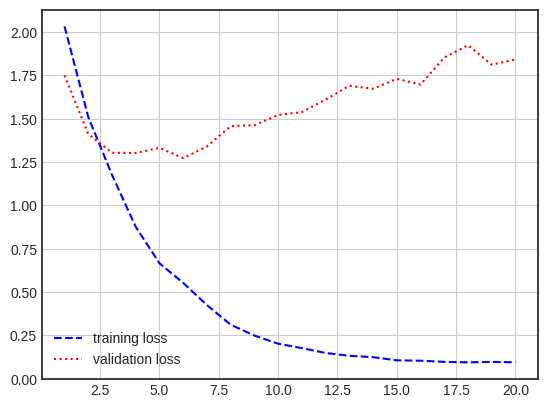

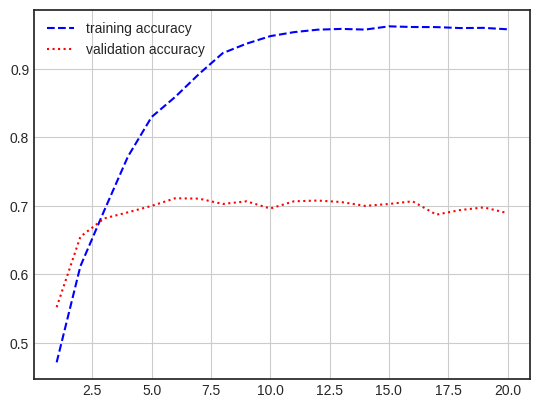

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()
# 오버피팅

### 모델 평가


In [46]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 14ms/step - loss: 2.0360 - acc: 0.6808


[2.0360333919525146, 0.6807658076286316]